<a href="https://colab.research.google.com/github/Matinsalami/DataScience/blob/main/Hands_on_Machine_Learning/chapter_4/Training_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression

## The Normal equation

Normal equation is a closed form solution for minimizing the cost function(MSE).  

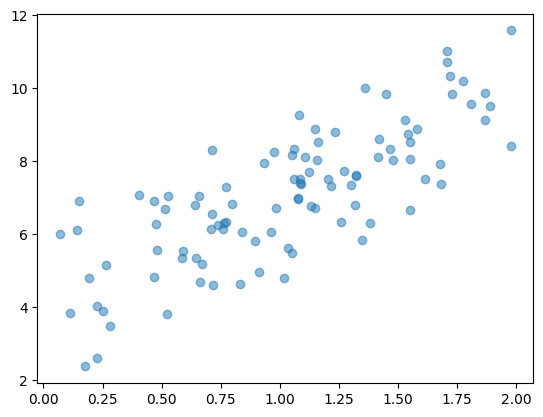

In [1]:
#Generate some linear_looking code
import numpy as np
import matplotlib.pyplot as plt

X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100, 1)

plt.scatter(X,y,alpha=0.5)

In [2]:
#Now we will compute the expected parameters with Normal Equation
#First we should set x0 = 1 for all instances. The reason is that we should include the intercept of equation

X_b = np.c_[np.ones((100,1)), X] # column concatination
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [3]:
theta_best # We supposed to compute 4 for intercept and 3 for the coeeficient, but with the Gaussian noise that we have, the predictions is not completely correct

array([[4.06485042],
       [2.92127597]])

In [4]:
#Now let's make some predicitons with theta_best
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.06485042],
       [9.90740237]])

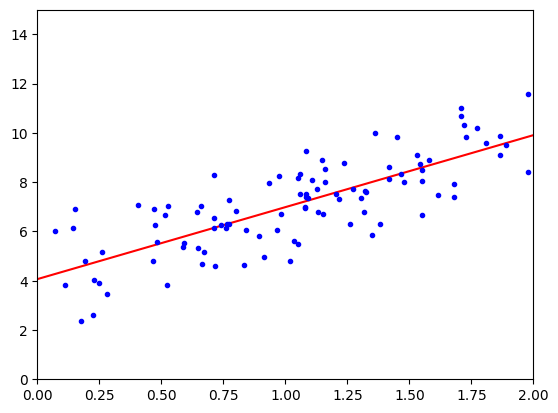

In [5]:
# We can plot this model's predictions:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0,2,0,15])
plt.show()

In [6]:
# There is aregression model in Scikit-learn which uses Normal Equation

from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)  # Fit the data
lin_reg.intercept_, lin_reg.coef_   # Display the y-intercept and coefficient

(array([4.06485042]), array([[2.92127597]]))

In [7]:
lin_reg.predict(X_new)

array([[4.06485042],
       [9.90740237]])

# Gradient Descent

## Batch Gradient Descent

In [23]:
# We use gradient descent as an optimization algorithm to find the optimal solutions to minimize cost functions(Here MSE)
eta = 0.1  # learning rate(too small = slow learning| too big = unstable updates)
n_iterations = 1000 # we will apply gradient descent 1000 times on the data
m =100 # number of training examples
theta = np.random.randn(2,1) # random initialization of the parameters

for iteration in range(n_iterations):
  gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)   # this is the formula for gradient descent on the parameters given
  theta = theta - eta * gradients  # we update the new values for the parameters

# To find a good learning rate we can use GridSearch
# We must set the n_iterations a large number and set a threshold for the norm of gradient vector

# Now let's check the values for theta
theta

array([[4.06485042],
       [2.92127597]])

## Stochastic Gradient Descent

In [32]:
# Stochastic Gradient Descent uses only 1 instance at a time to compute the gradients. This speeds up the training

n_epochs = 50 # Number of iterations we apply gradient descent

t0, t1 = 5,50 # learning schedule hyperparameters

def learning_schedule(t):
  return t0 / (t + t1)

theta = np.random.randn(2,1) # random initialization

for epoch in range(n_epochs):
  for i in range(m):
    random_index = np.random.randint(m)          # randomly pick an instance in the dataset
    xi = X_b[random_index:random_index+1]        # it's vector of dependent variables
    yi = y[random_index:random_index+1]          # the true value for the instance
    gradients = 2 * xi.T.dot(xi.dot(theta) - yi) # compute the gradient descent algorithm on the instance
    eta = learning_schedule(epoch * m + i)       # slowly decaying the learning rate
    theta = theta - eta * gradients              # update the parameters

theta

array([[4.03865486],
       [3.00321657]])

In [38]:
# Now we use the Stochastic Gradient descent in scikit-learn
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X,y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [39]:
sgd_reg.intercept_

array([3.98269163])

In [40]:
sgd_reg.coef_

array([2.89805613])